In [1]:
import os
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datasets
import os
import cv2

C:\Users\dboga\PycharmProjects\sleep quality using computer vision\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset = datasets.load_dataset("Dataset/Train")

In [10]:
dataset_test = datasets.load_dataset("Dataset/Test")

Computing checksums: 100%|██████████| 96407/96407 [00:06<00:00, 13982.94it/s]
Generating train split: 96407 examples [00:07, 12768.77 examples/s]


In [23]:
dataset = dataset['train']+dataset['test']
dataset_test = dataset_test['train']+dataset_test['test']

KeyError: "Column train not in the dataset. Current columns in the dataset: ['image', 'label']"

In [24]:
print(dataset.shape)
print(dataset_test.shape)

(771245, 2)
(96407, 2)


In [29]:
dataset_tf = dataset.to_tf_dataset(
    columns="image",
    label_cols="label",
    batch_size=64,
    shuffle=True
)

dataset_tf_test = dataset_test.to_tf_dataset(
    columns="image",
    label_cols="label",
    batch_size=64,
    shuffle=True
)

In [31]:
class SleepNet(tf.keras.Model):
    def __init__(self):
        super(SleepNet, self).__init__()

        initializer = tf.initializers.VarianceScaling(scale=2.0)
        self.conv1 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same',
                                   kernel_initializer=initializer, groups=8, data_format='channels_first')
        self.conv2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same',
                                   kernel_initializer=initializer, groups=16)
        self.conv3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same',
                                   kernel_initializer=initializer, groups=32)
        
        self.maxpool = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        self.flatten = tf.keras.layers.Flatten()
        
        self.dropout = tf.keras.layers.Dropout(rate=0.5)
        
        self.fc1 = tf.keras.layers.Dense(512, kernel_initializer=initializer,activation='relu')
        
        
        self.fc2 = tf.keras.layers.Dense(5, kernel_initializer=initializer)
        
        self.softmax = tf.keras.layers.Softmax()
    
    def call(self, input_tensor, training=False):
        
        x = self.conv1(input_tensor)
        x = self.conv1(x)
        
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.conv2(x)
        
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.conv3(x)
        
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.softmax(x)       

        return x

In [28]:
model = SleepNet()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=[tf.keras.metrics.sparse_categorical_accuracy])
model.summary()

Model: "sleep_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

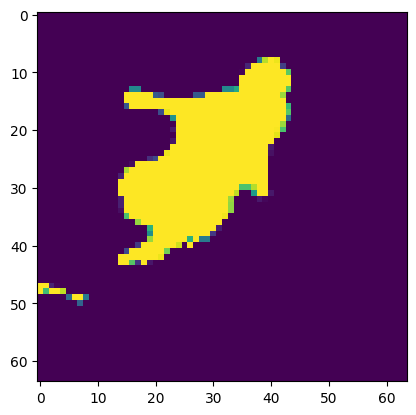

AttributeError: 'PngImageFile' object has no attribute 'shape'

In [38]:
plt.plot()
plt.imshow(dataset_test[0]["image"])
plt.show()

print(dataset_test[0]["image"])

In [36]:
model.fit(dataset_tf, batch_size=64, epochs=10)
model.evaluate(dataset_tf_test)

Epoch 1/10


ValueError: Exception encountered when calling SleepNet.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 64, 64)[0m

Arguments received by SleepNet.call():
  • input_tensor=tf.Tensor(shape=(None, 64, 64), dtype=int64)
  • training=True